In [ ]:
from math import sqrt
from sklearn.metrics import *

# Matrix

In [ ]:
class Matrix:
    def __init__(self, data):
        if isinstance(data, tuple):
            self.data = [[0.0 for _ in range(data[1])] for _ in range(data[0])]
            self.shape = data
        elif isinstance(data, list):
            self.data = data
            self.shape = (len(data), len(data[0]))
        else:
            raise TypeError("Data should be a list of lists or a tuple")

    def __repr__(self):
        return f"Matrix({self.data})"

    def T(self):
        transposed_data = list(map(list, zip(*self.data)))
        return Matrix(transposed_data)
        
    def __add__(self, other):
        if isinstance(other, Matrix) and self.shape == other.shape:
            added_data = [[self.data[i][j] + other.data[i][j] for j in range(self.shape[1])] for i in range(self.shape[0])]
            return Matrix(added_data)
        else:
            raise ValueError("Can only add matrices of the same dimensions")

    def __sub__(self, other):
        if isinstance(other, Matrix) and self.shape == other.shape:
            subtracted_data = [[self.data[i][j] - other.data[i][j] for j in range(self.shape[1])] for i in range(self.shape[0])]
            return Matrix(subtracted_data)
        else:
            raise ValueError("Can only subtract matrices of the same dimensions")

    def __truediv__(self, scalar):
        if isinstance(scalar, (int, float)):
            divided_data = [[self.data[i][j] / scalar for j in range(self.shape[1])] for i in range(self.shape[0])]
            return Matrix(divided_data)
        else:
            raise ValueError("Can only divide by a scalar")

    def __mul__(self, other) -> Matrix:
        m, n, p = self.shape[0], self.shape[1], other.shape[1]
    
        if self.shape[1] != other.shape[0]: 
            raise ValueError("Number of columns of first matrix must match number of rows in second matrix for multiplication.")
    
        def dot(l1, l2) -> float:
            return sum(l1[i] * l2[i] for i in range(len(l1)))
    
        res = []
        for i in range(m):
            arr = []
            for j in range(p):
                arr.append(dot(self.data[i], [other.data[k][j] for k in range(n)]))
            res.append(arr)
        return Matrix(res)

    def __rmul__(self, other) -> 'Matrix':
        if isinstance(other, (int, float)):  # scalar multiplication
            return self.__mul__(other)
        else:
            raise TypeError("Unsupported operand type for multiplication")


    def __radd__(self, other):
        return self.__add__(other)
    
    def __rsub__(self, other):
        return self.__sub__(other).__mul__(-1)

    def __rtruediv__(self, scalar):
        if isinstance(scalar, (int, float)):
            divided_data = [[scalar / self.data[i][j] for j in range(self.shape[1])] for i in range(self.shape[0])]
            return Matrix(divided_data)
        else:
            raise ValueError("Can only divide by a scalar")

### Test 1

In [ ]:
m1 = Matrix([[0.0, 1.0], [2.0, 3.0], [4.0, 5.0]])
print(m1.shape) # Output: (3, 2)

(3, 2)


In [ ]:
m1.T() # Output: Matrix([[0., 2., 4.], [1., 3., 5.]])

Matrix([[0.0, 2.0, 4.0], [1.0, 3.0, 5.0]])

In [ ]:
m1.T().shape # Output: (2, 3)

(2, 3)

In [ ]:
m1.data

[[0.0, 1.0], [2.0, 3.0], [4.0, 5.0]]

### Test 2

In [ ]:
m1 = Matrix([[0., 2., 4.], [1., 3., 5.]])
m1.shape # Output: (2, 3)

(2, 3)

In [ ]:
m1.T() # Output: Matrix([[0.0, 1.0], [2.0, 3.0], [4.0, 5.0]])

Matrix([[0.0, 1.0], [2.0, 3.0], [4.0, 5.0]])

In [ ]:
m1.T().shape # Output: (3, 2)

(3, 2)

# Vector

In [ ]:
class Vector(Matrix):
    def __init__(self, data):
        super().__init__(data)
        if self.shape[0] > 1 and self.shape[1] > 1:
            raise ValueError("Vector can only be initialized with a row or a column")

    def _perform_operation_and_return_vector(self, operation, *args):
        result_matrix = operation(*args)
        return Vector(result_matrix.data)

    def __add__(self, other):
        return self._perform_operation_and_return_vector(super().__add__, other)

    def __sub__(self, other):
        return self._perform_operation_and_return_vector(super().__sub__, other)
    
    def __truediv__(self, scalar):
        return self._perform_operation_and_return_vector(super().__truediv__, scalar)
    
    def __radd__(self, other):
        return self.__add__(other)
    
    def __rsub__(self, other):
        return self.__sub__(other).__mul__(-1)

    def __rtruediv__(self, scalar):
        return self._perform_operation_and_return_vector(super().__rtruediv__, scalar)

    def dot(self, v: Vector) -> float:
        if self.shape != v.shape: raise ValueError('shapes does not match!')

        if self.shape[0] == 1:  # row vector
            return sum(self.data[0][i] * v.data[0][i] for i in range(self.shape[1]))
        else:  # column vector
            return sum(self.data[i][0] * v.data[i][0] for i in range(self.shape[0]))


## Testing

In [ ]:
v1 = Vector([[1, 2, 3]])  # creates a row vector
print(v1.shape)  # Output: (1, 3)

(1, 3)


In [ ]:
v2 = Vector([[1], [2], [3]])  # creates a column vector
print(v2.shape)  # Output: (3, 1)

(3, 1)


In [ ]:
try:
    v3 = Vector([[1, 2], [3, 4]])  # should raise ValueError
except ValueError as e:
    print(e)  # Output: Vector can only be initialized with a row or a column

Vector can only be initialized with a row or a column


In [ ]:
v1 = Vector([[1], [2], [3]])
v2 = Vector([[2], [4], [8]])
res = v1 + v2 # Output: Vector([[3],[6],[11]])
res

Matrix([[3], [6], [11]])

In [ ]:
type(res)

__main__.Vector

In [ ]:
v1.shape

(3, 1)

In [ ]:
v2.shape

(3, 1)

In [ ]:
res = 0.0
for i in range(v1.shape[0]): res += v1.data[i][0] * v2.data[i][0]

In [ ]:
res

34.0

In [ ]:
v1.dot(v2)

34

In [ ]:
v1 = Vector([[1, 2, 3]])
v2 = Vector([[2, 4, 8]])
res = v1 + v2 # Output: Vector([[3],[6],[11]])
res, res.shape

(Matrix([[3, 6, 11]]), (1, 3))

In [ ]:
res = 0.0
for i in range(v1.shape[1]): res += v1.data[0][i] * v2.data[0][i]

In [ ]:
res

34.0

In [ ]:
v1.dot(v2)

34

In [ ]:
m1 = Matrix([[0.0, 1.0, 2.0, 3.0],
             [0.0, 2.0, 4.0, 6.0]])

m2 = Matrix([[0.0, 1.0],
             [2.0, 3.0],
             [4.0, 5.0],
             [6.0, 7.0]])

m1 * m2 # Output: Matrix([[28., 34.], [56., 68.]])

Matrix([[28.0, 34.0], [56.0, 68.0]])

In [ ]:
m1 = Matrix([[0.0, 1.0, 2.0],
             [0.0, 2.0, 4.0]])

v1 = Vector([[1], [2], [3]])
v1 * m1 
# Output: Matrix([[8], [16]])
# Or: Vector([[8], [16]

TypeError: unsupported operand type(s) for *: 'Vector' and 'Matrix'

In [ ]:
v1.shape

(3, 1)

In [ ]:
m1.shape

(2, 3)

In [ ]:
import numpy as np


# ex02

In [ ]:
def simple_predict(x, theta):
    """
    Computes the vector of prediction y_hat from two non-empty numpy.ndarray.
    
    Args:
    x: has to be an numpy.ndarray, a vector of dimension m * 1.
    theta: has to be an numpy.ndarray, a vector of dimension 2 * 1.
    
    Returns:
    y_hat as a numpy.ndarray, a vector of dimension m * 1.
    None if x or theta are empty numpy.ndarray.
    None if x or theta dimensions are not appropriate.
    
    Raises:
    This function should not raise any Exception.
    """
    
    if not (isinstance(x, np.ndarray) and isinstance(theta, np.ndarray)):
        return None

    if x.size == 0 or theta.size == 0:
        return None

    if theta.shape != (2,):
         return None

    y_hat = theta[0] + theta[1] * x
    return y_hat

## Example 1:

In [ ]:
x = np.arange(1,6)
theta1 = np.array([5, 0])
simple_predict(x, theta1)
# Ouput: array([5., 5., 5., 5., 5.])
# Do you understand why y_hat contains only 5’s here?

array([5, 5, 5, 5, 5])

In [ ]:
x, theta1

(array([1, 2, 3, 4, 5]), array([5, 0]))

In [ ]:
theta1[1] * x

array([0, 0, 0, 0, 0])

In [ ]:
theta1[0] + theta1[1] * x

array([5, 5, 5, 5, 5])

## Example 2:

In [ ]:
theta2 = np.array([0, 1])
simple_predict(x, theta2) # Output: array([1., 2., 3., 4., 5.])
# Do you understand why y_hat == x here?

array([1, 2, 3, 4, 5])

## Example 3:

In [ ]:
theta3 = np.array([5, 3])
simple_predict(x, theta3)
# Output: array([ 8., 11., 14., 17., 20.])

array([ 8, 11, 14, 17, 20])

## Example 4:

In [ ]:
theta4 = np.array([-3, 1])
simple_predict(x, theta4)
# Output: array([-2., -1., 0., 1., 2.])

array([-2, -1,  0,  1,  2])

# ex03

In [ ]:
def add_intercept(x):
    """
    Adds a column of 1’s to the non-empty numpy.array x.
    
    Args:
    x: has to be a numpy.array of dimension m * n.
    
    Returns:
    X, a numpy.array of dimension m * (n + 1).
    None if x is not a numpy.array.
    None if x is an empty numpy.array.
    
    Raises:
    This function should not raise any Exception.
    """

    if not isinstance(x, np.ndarray) or x.size == 0:
        return None

    if len(x.shape) == 1: x = x.reshape(x.shape[0], 1)
    
    ones = np.ones((x.shape[0], 1))
    X = np.hstack((ones, x))
    return X

In [ ]:
x = np.arange(1,6)
x, x.shape

(array([1, 2, 3, 4, 5]), (5,))

In [ ]:
ones = np.ones((x.shape[0], 1))
ones

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
np.hstack((ones, x.reshape(x.shape[0], 1)))

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.]])

In [ ]:
res = add_intercept(x)
res, res.shape

(array([[1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.],
        [1., 5.]]),
 (5, 2))

In [ ]:
y = np.arange(1,10).reshape((3,3))
y, y.shape

(array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]),
 (3, 3))

In [ ]:
res = add_intercept(y)
res, res.shape

(array([[1., 1., 2., 3.],
        [1., 4., 5., 6.],
        [1., 7., 8., 9.]]),
 (3, 4))

# ex04

In [ ]:
def predict_(x, theta):
    """
    Computes the vector of prediction y_hat from two non-empty numpy.array.
    
    Args:
    x: has to be an numpy.array, a vector of dimension m * 1.
    theta: has to be an numpy.array, a vector of dimension 2 * 1.
    
    Returns:
    y_hat as a numpy.array, a vector of dimension m * 1.
    None if x and/or theta are not numpy.array.
    None if x or theta are empty numpy.array.
    None if x or theta dimensions are not appropriate.
    
    Raises:
    This function should not raise any Exceptions.
    """

    if not (isinstance(x, np.ndarray) and isinstance(theta, np.ndarray)):
        return None

    if x.size == 0 or theta.size == 0:
        return None

    if theta.shape != (2,1):
         return None

    
    
    return add_intercept(x) @ theta

In [ ]:
x = np.arange(1,6)

## Example 1:

In [ ]:
theta1 = np.array([[5], [0]])
predict_(x, theta1)

array([[5.],
       [5.],
       [5.],
       [5.],
       [5.]])

In [ ]:
add_intercept(x).shape, theta1.shape

((5, 2), (2, 1))

# ex05

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot(x, y, theta):
    """
    Plot the data and prediction line from three non-empty numpy.array.
    
    Args:
    x: has to be an numpy.array, a vector of dimension m * 1.
    y: has to be an numpy.array, a vector of dimension m * 1.
    theta: has to be an numpy.array, a vector of dimension 2 * 1.
    
    Returns:
    Nothing.
    
    Raises:
    This function should not raise any Exceptions.
    """
    y_pred = predict_(x, theta)
    plt.scatter(x, y, s=25, label='Data points')
    plt.plot(x, y_pred, '--', label='Linear regression', c='r')
    _ = plt.legend(loc='best')

In [ ]:
x = np.arange(1,6)
y = np.array([3.74013816, 3.61473236, 4.57655287, 4.66793434, 5.95585554])

## Example 1:

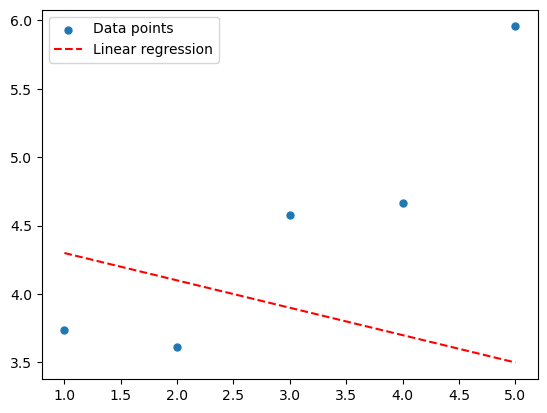

In [ ]:
theta1 = np.array([[4.5],[-0.2]])
plot(x, y, theta1)

## Example 2:

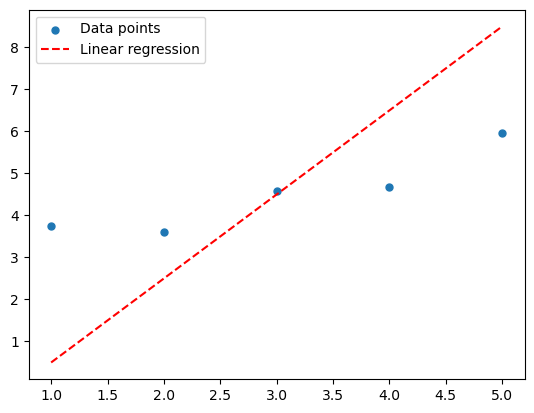

In [ ]:
theta2 = np.array([[-1.5],[2]])
plot(x, y, theta2)

## Example 3:

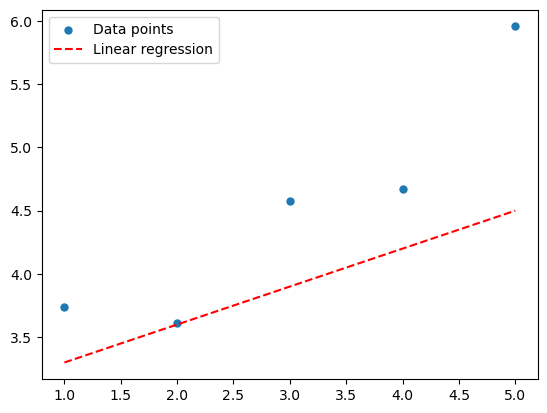

In [ ]:
theta3 = np.array([[3],[0.3]])
plot(x, y, theta3)

# ex06

In [ ]:
def loss_elem_(y, y_hat):
    """
    Description:
    Calculates all the elements (y_pred - y)^2 of the loss function.
    
    Args:
    y: has to be an numpy.array, a vector.
    y_hat: has to be an numpy.array, a vector.
    
    Returns:
    J_elem: numpy.array, a vector of dimension (number of the training examples,1).
    None if there is a dimension matching problem between X, Y or theta.
    None if any argument is not of the expected type.
    
    Raises:
    This function should not raise any Exception.
    """

    
    if not (isinstance(y, np.ndarray) and isinstance(y_hat, np.ndarray)):
        return None
    if y.shape != y_hat.shape:
        return None

    J_elem = np.zeros(y.shape)
    for i in range(len(y)):
        J_elem[i] = (y[i] - y_hat[i]) ** 2

    return J_elem


def loss_(y, y_hat):
    """
    Description:
    Calculates the value of loss function.
    
    Args:
    y: has to be an numpy.array, a vector.
    y_hat: has to be an numpy.array, a vector.
    
    Returns:
    J_value : has to be a float.
    None if there is a dimension matching problem between X, Y or theta.
    None if any argument is not of the expected type.
    
    Raises:
    This function should not raise any Exception.
    """

    J_elem = loss_elem_(y, y_hat)
    if J_elem is None:
        return None

    J_value = 0.0
    for elem in J_elem:
        J_value += elem
    J_value /= (2 * len(J_elem))

    return float(J_value)

In [ ]:
x1 = np.array([[0.], [1.], [2.], [3.], [4.]])
theta1 = np.array([[2.], [4.]])
y_hat1 = predict_(x1, theta1)
y1 = np.array([[2.], [7.], [12.], [17.], [22.]])

## Example 1:

In [ ]:
loss_elem_(y1, y_hat1)
# Output: array([[0.], [1], [4], [9], [16]])

array([[ 0.],
       [ 1.],
       [ 4.],
       [ 9.],
       [16.]])

## Example 2:

In [ ]:
loss_(y1, y_hat1)
# Output: 3.0

3.0

In [ ]:
x2 = np.array([0, 15, -9, 7, 12, 3, -21]).reshape(-1, 1)
theta2 = np.array([[0.], [1.]]).reshape(-1, 1)
y_hat2 = predict_(x2, theta3)
y2 = np.array([2, 14, -13, 5, 12, 4, -19]).reshape(-1, 1)

## Example 3:

In [ ]:
loss_(y2, y_hat2)
# Output: 2.142857142857143

35.415

## Example 4:

In [ ]:
loss_(y2, y2)
# Output

0.0

# ex07

In [ ]:
def loss_(y, y_hat):
    """
    Computes the half mean squared error of two non-empty numpy.array, without any for loop.
    The two arrays must have the same dimensions.
    Args:
    y: has to be an numpy.array, a vector.
    y_hat: has to be an numpy.array, a vector.
    Returns:
    The half mean squared error of the two vectors as a float.
    None if y or y_hat are empty numpy.array.
    None if y and y_hat does not share the same dimensions.
    Raises:
    This function should not raise any Exceptions.
    """
    return ((y - y_hat) ** 2).mean() * 0.5

In [ ]:
X = np.array([[0], [15], [-9], [7], [12], [3], [-21]])
Y = np.array([[2], [14], [-13], [5], [12], [4], [-19]])

## Example 1:


In [ ]:
loss_(X, Y)
# Output: 2.142857142857143

2.142857142857143

## Example 2:

In [ ]:
loss_(X, X) # Output: 0.0

0.0

In [ ]:
def plot_with_loss(x, y, theta):
    """
    Plot the data and prediction line from three non-empty numpy.ndarray.
    
    Args:
    x: has to be an numpy.ndarray, a vector of dimension m * 1.
    y: has to be an numpy.ndarray, a vector of dimension m * 1.
    theta: has to be an numpy.ndarray, a vector of dimension 2 * 1.
    
    Returns:
    Nothing.
    
    Raises:
    This function should not raise any Exception.
    """

    y_pred = predict_(x, theta)
    error = y - y_pred[:, 0]
    mse_loss = loss_(y_pred, y).round(2)
    plt.bar(x, error, width=0.03, bottom=y_pred[:, 0], color='salmon', alpha=0.7)  # a softer shade of red
    plt.fill_between(x, y, y_pred.flatten(), color='skyblue', alpha=0.4, label=f'Error (MSE = {mse_loss})')  # softer shade of blue
    plt.scatter(x, y, s=25, label='Data points')  # dark blue for data points
    plt.plot(x, y_pred, '--', color='darkred', label='Linear regression')  # dark red for the regression line
    plt.legend(loc='best')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Adding grid for better readability
    plt.show()

In [ ]:
x = np.arange(1,6)
y = np.array([11.52434424, 10.62589482, 13.14755699, 18.60682298, 14.14329568])

## Example 1:

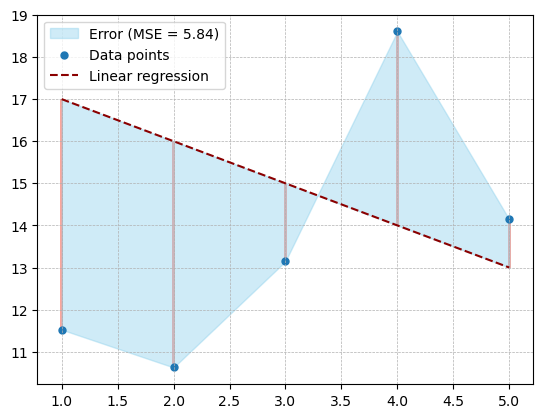

In [ ]:
theta1= np.array([[18],[-1]])
plot_with_loss(x,y, theta1)

## Example 2:

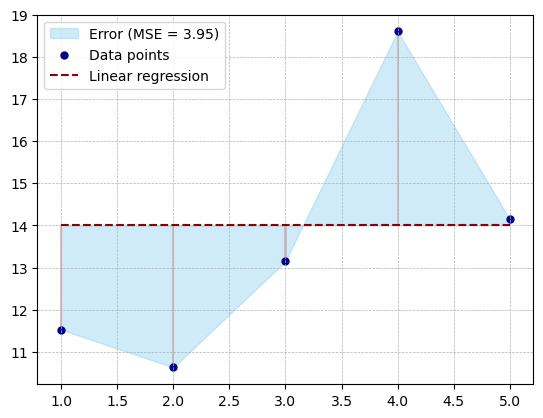

In [ ]:
theta2 = np.array([[14], [0]])
plot_with_loss(x, y, theta2)
# Output:

## Example 3:

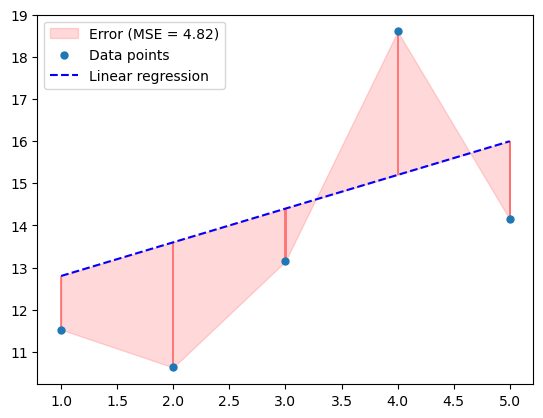

In [ ]:
theta3 = np.array([[12], [0.8]])
plot_with_loss(x, y, theta3)
# Output:

In [ ]:
def mse_(y, y_hat):
    """
    Description:
    Calculate the MSE between the predicted output and the real output.
    
    Args:
    y: has to be a numpy.array, a vector of dimension m * 1.
    y_hat: has to be a numpy.array, a vector of dimension m * 1.
    
    Returns:
    mse: has to be a float.
    None if there is a matching dimension problem.
    
    Raises:
    This function should not raise any Exceptions.
    """

    return ((y - y_hat) ** 2).mean()

def rmse_(y, y_hat):
    """
    Description:
    Calculate the RMSE between the predicted output and the real output.
    Args:
    y: has to be a numpy.array, a vector of dimension m * 1.
    y_hat: has to be a numpy.array, a vector of dimension m * 1.
    Returns:
    rmse: has to be a float.
    None if there is a matching dimension problem.
    Raises:
    This function should not raise any Exceptions.
    """

    return sqrt(mse_(y, y_hat))

def mae_(y, y_hat):
    """
    Description:
    Calculate the MAE between the predicted output and the real output.
    Args:
    y: has to be a numpy.array, a vector of dimension m * 1.
    y_hat: has to be a numpy.array, a vector of dimension m * 1.
    Returns:
    mae: has to be a float.
    None if there is a matching dimension problem.
    Raises:
    This function should not raise any Exceptions.
    """

    return np.abs(y - y_hat).mean()

def r2score_(y, y_hat):
    """
    Description:
    Calculate the R2score between the predicted output and the output.
    Args:
    y: has to be a numpy.array, a vector of dimension m * 1.
    y_hat: has to be a numpy.array, a vector of dimension m * 1.
    Returns:
    r2score: has to be a float.
    None if there is a matching dimension problem.
    Raises:
    This function should not raise any Exceptions.
    """

    
    return 1 - (((y - y_hat) ** 2).sum() / ((y - y.mean()) ** 2).sum())

In [ ]:
x = np.array([0, 15, -9, 7, 12, 3, -21])
y = np.array([2, 14, -13, 5, 12, 4, -19])

## Testing:


### Mean squared error


In [ ]:
## your implementation
my_ = mse_(x,y) ## Output: 4.285714285714286
## sklearn implementation
sk_ = mean_squared_error(x,y) ## Output: 4.285714285714286

In [ ]:
my_, sk_

(4.285714285714286, 4.285714285714286)

### Root mean squared error


In [ ]:
## your implementation
my_ = rmse_(x,y) ## Output: 2.0701966780270626
## sklearn implementation not available: take the square root of MSE
sk_ = sqrt(mean_squared_error(x,y)) ## Output: 2.0701966780270626

In [ ]:
my_, sk_

(2.0701966780270626, 2.0701966780270626)

### Mean absolute error


In [ ]:
## your implementation
my_ = mae_(x,y)
# Output: 1.7142857142857142
## sklearn implementation
sk_ = mean_absolute_error(x,y)
# Output: 1.7142857142857142

In [ ]:
my_, sk_

(1.7142857142857142, 1.7142857142857142)

### R2-score


In [ ]:
## your implementation
my_ = r2score_(x,y) ## Output: 0.9681721733858745
## sklearn implementation
sk_ = r2_score(x,y) ## Output: 0.9681721733858745

In [ ]:
my_, sk_

(0.9681528662420382, 0.9681528662420382)